# <center>Simple Linear Regression</center>
## <center>by Mathematical Approach</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Fuel Dataset

In [2]:
data = pd.read_csv("data/FuelConsumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploring Data

In [3]:
data.describe() 

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


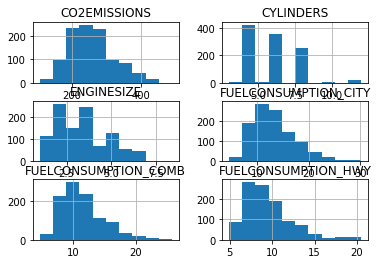

In [4]:
viz = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

#### Finding the best Linear Independent Variable (X) for dependent (Y) as CO2EMISSION

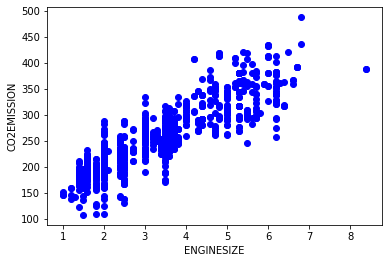

In [5]:
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, c='b')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

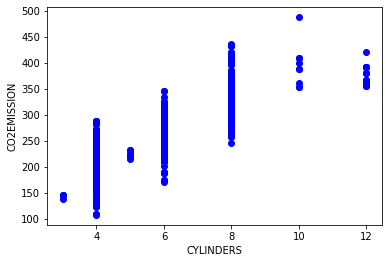

In [6]:
plt.scatter(data.CYLINDERS, data.CO2EMISSIONS, c='b')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSION')
plt.show()

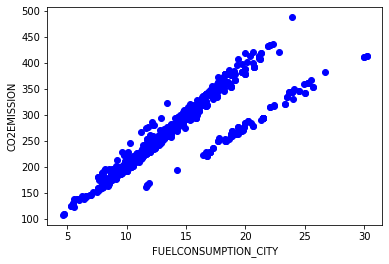

In [7]:
plt.scatter(data.FUELCONSUMPTION_CITY, data.CO2EMISSIONS, c='b')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSION')
plt.show()

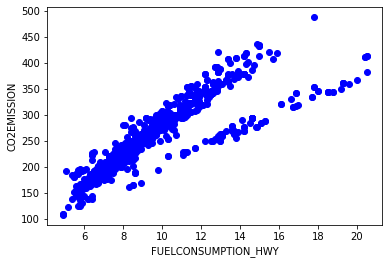

In [8]:
plt.scatter(data.FUELCONSUMPTION_HWY, data.CO2EMISSIONS, c='b')
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSION')
plt.show()

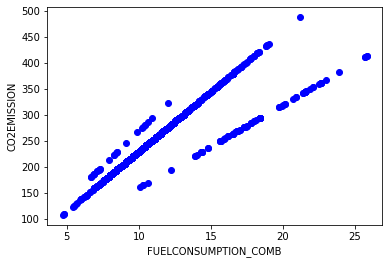

In [9]:
plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS, c='b')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSION')
plt.show()

The Best among the independent variables, we find ENGINESIZE as the most suitable for Simple Linear Regression.

In [10]:
x = 'ENGINESIZE'
y = 'CO2EMISSIONS'

### Creating Test and Train Data 80:20 split

In [11]:
mask = np.random.rand(len(data)) < 0.8
train_data = data[mask]
test_data = data[~mask]

train_x = np.asanyarray(train_data[[x]])
train_y = np.asanyarray(train_data[[y]])

test_x = np.asanyarray(test_data[[x]])
test_y = np.asanyarray(test_data[[y]])

### Training the Simple Linear Model with Mathematical Formulae

In [12]:
mean_x = np.mean(train_x)
mean_y = np.mean(train_y)

a, b = 0, 0
for i in range(len(train_x)):
    a += (train_x[i] - mean_x) * (train_y[i] - mean_y)
    b += (train_x[i] - mean_x) ** 2

coefficient = a / b
intercept = mean_y - (coefficient * mean_x)
print("Coefficient:\t", coefficient[0])
print("Intercept:\t", intercept[0])

Coefficient:	 39.83470377506232
Intercept:	 123.03725726872764


### Predicting and Plotting the Linear Model

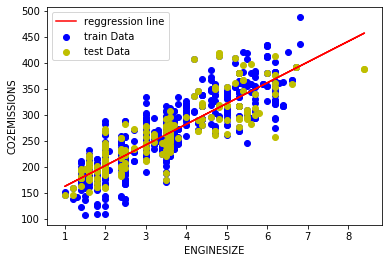

In [13]:
predicted_y = intercept + coefficient * test_x

plt.scatter(train_x, train_y, c='b', label="train Data")
plt.scatter(test_x, test_y, c='y', label="test Data")
plt.plot(test_x, predicted_y, c='r', label="reggression line")
plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

In [40]:
mean_y = np.mean(test_y)
MSE = np.mean((test_y - predicted_y) ** 2)  # Residual Mean Square Error
TSS = np.mean((test_y - mean_y) ** 2)     # Total Sum of Squares

r2 = 1 - MSE/TSS   # Coefficent of Determination

In [41]:

from sklearn.metrics import r2_score
print("Mean Absolute Error:\t\t%0.2f" % np.mean(np.absolute(predicted_y - test_y)))
print("Residual Mean Square Error:\t%0.2f" % MSE)
print("R2-Score:\t\t\t%0.2f" % r2_score(test_y, predicted_y))
print("R2-Score(manual):\t\t%0.2f" % r2)
    

Mean Absolute Error:		21.61
Residual Mean Square Error:	820.85
R2-Score:			0.81
R2-Score(manual):		0.81
